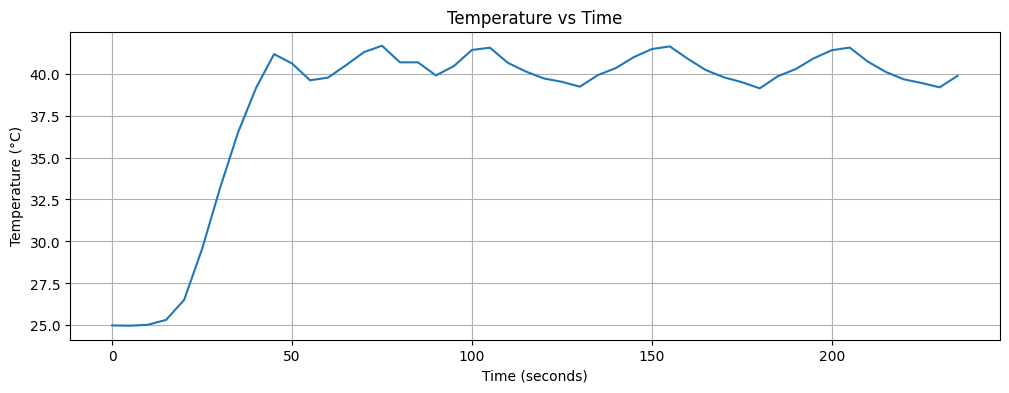

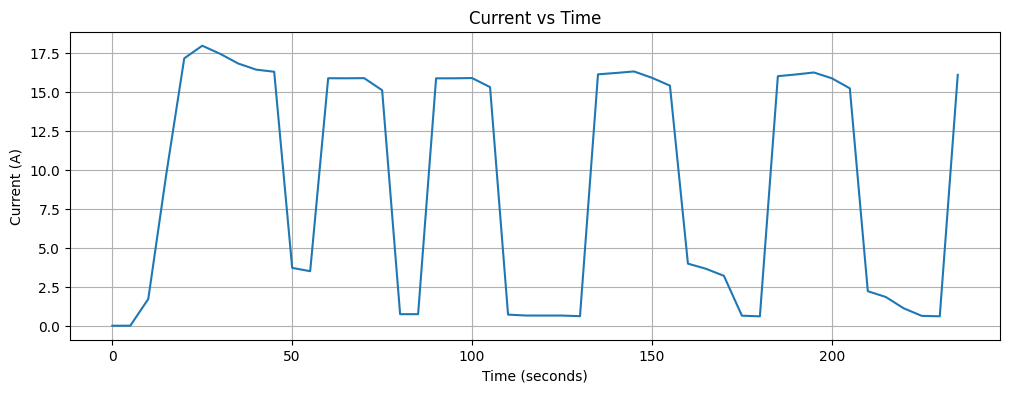

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

raw_data = """
TEMP:25.00,CURR:0.000
TEMP:24.98,CURR:0.000
TEMP:25.04,CURR:1.716
TEMP:25.33,CURR:9.713
TEMP:26.52,CURR:17.154
TEMP:29.56,CURR:17.962
TEMP:33.19,CURR:17.441
TEMP:36.50,CURR:16.820
TEMP:39.15,CURR:16.427
TEMP:41.16,CURR:16.293
TEMP:40.60,CURR:3.710
TEMP:39.60,CURR:3.498
TEMP:39.76,CURR:15.875
TEMP:40.50,CURR:15.873
TEMP:41.28,CURR:15.882
TEMP:41.66,CURR:15.109
TEMP:40.67,CURR:0.741
TEMP:40.67,CURR:0.741
TEMP:39.89,CURR:15.870
TEMP:40.45,CURR:15.872
TEMP:41.41,CURR:15.888
TEMP:41.54,CURR:15.306
TEMP:40.64,CURR:0.712
TEMP:40.12,CURR:0.654
TEMP:39.71,CURR:0.652
TEMP:39.51,CURR:0.652
TEMP:39.22,CURR:0.612
TEMP:39.91,CURR:16.127
TEMP:40.33,CURR:16.214
TEMP:40.98,CURR:16.312
TEMP:41.46,CURR:15.905
TEMP:41.62,CURR:15.401
TEMP:40.88,CURR:3.982
TEMP:40.21,CURR:3.654
TEMP:39.78,CURR:3.201
TEMP:39.49,CURR:0.644
TEMP:39.12,CURR:0.601
TEMP:39.84,CURR:16.008
TEMP:40.27,CURR:16.118
TEMP:40.91,CURR:16.245
TEMP:41.39,CURR:15.873
TEMP:41.55,CURR:15.227
TEMP:40.72,CURR:2.214
TEMP:40.10,CURR:1.843
TEMP:39.66,CURR:1.115
TEMP:39.44,CURR:0.632
TEMP:39.18,CURR:0.604
TEMP:39.87,CURR:16.092

"""

records = []
for line in raw_data.strip().split("\n"):
    temp = float(line.split(",")[0].split(":")[1])
    curr = float(line.split(",")[1].split(":")[1])
    records.append((temp, curr))

df = pd.DataFrame(records, columns=["Temperature", "Current"])

# Create time axis (5-second step)
df["Time_s"] = df.index * 5

# Plot temperature
plt.figure(figsize=(12,4))
plt.plot(df["Time_s"], df["Temperature"])
plt.title("Temperature vs Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

# Plot current
plt.figure(figsize=(12,4))
plt.plot(df["Time_s"], df["Current"])
plt.title("Current vs Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Current (A)")
plt.grid(True)
plt.show()


TEMP-ONLY
 Energy: 5.75 kWh
 Cost: 0.52 €

PRICE-AWARE
 Energy: 5.75 kWh
 Cost: 0.47 €

SAVINGS
 Absolute: 0.05 €
 Relative: 10.1 %


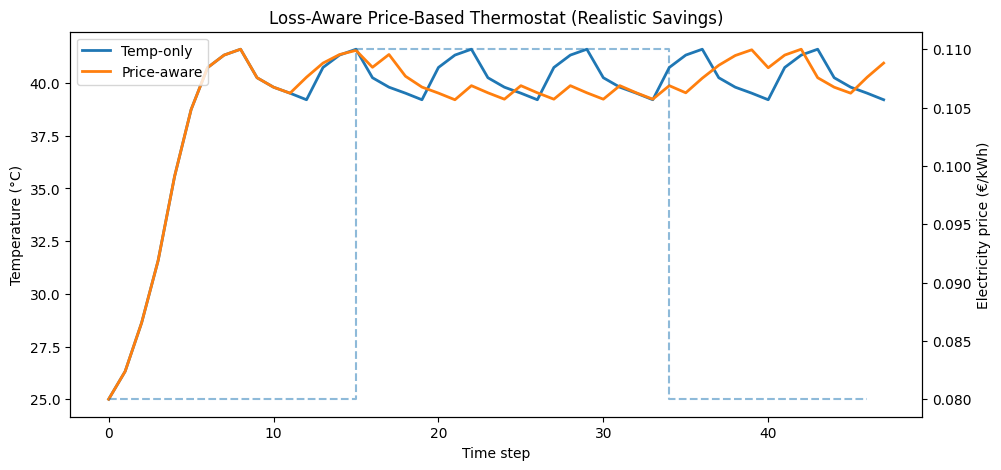

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# ============================================================
# 1) RAW DATA
# ============================================================

raw_data = """
TEMP:25.00,CURR:0.000
TEMP:24.98,CURR:0.000
TEMP:25.04,CURR:1.716
TEMP:25.33,CURR:9.713
TEMP:26.52,CURR:17.154
TEMP:29.56,CURR:17.962
TEMP:33.19,CURR:17.441
TEMP:36.50,CURR:16.820
TEMP:39.15,CURR:16.427
TEMP:41.16,CURR:16.293
TEMP:40.60,CURR:3.710
TEMP:39.60,CURR:3.498
TEMP:39.76,CURR:15.875
TEMP:40.50,CURR:15.873
TEMP:41.28,CURR:15.882
TEMP:41.66,CURR:15.109
TEMP:40.67,CURR:0.741
TEMP:40.67,CURR:0.741
TEMP:39.89,CURR:15.870
TEMP:40.45,CURR:15.872
TEMP:41.41,CURR:15.888
TEMP:41.54,CURR:15.306
TEMP:40.64,CURR:0.712
TEMP:40.12,CURR:0.654
TEMP:39.71,CURR:0.652
TEMP:39.51,CURR:0.652
TEMP:39.22,CURR:0.612
TEMP:39.91,CURR:16.127
TEMP:40.33,CURR:16.214
TEMP:40.98,CURR:16.312
TEMP:41.46,CURR:15.905
TEMP:41.62,CURR:15.401
TEMP:40.88,CURR:3.982
TEMP:40.21,CURR:3.654
TEMP:39.78,CURR:3.201
TEMP:39.49,CURR:0.644
TEMP:39.12,CURR:0.601
TEMP:39.84,CURR:16.008
TEMP:40.27,CURR:16.118
TEMP:40.91,CURR:16.245
TEMP:41.39,CURR:15.873
TEMP:41.55,CURR:15.227
TEMP:40.72,CURR:2.214
TEMP:40.10,CURR:1.843
TEMP:39.66,CURR:1.115
TEMP:39.44,CURR:0.632
TEMP:39.18,CURR:0.604
TEMP:39.87,CURR:16.092
"""

temps, heater = [], []

for line in raw_data.strip().splitlines():
    T = float(line.split(",")[0].split(":")[1])
    C = float(line.split(",")[1].split(":")[1])
    temps.append(T)
    heater.append(1 if C > 5 else 0)

temps = np.array(temps)
heater = np.array(heater)

# ============================================================
# 2) ML DATASET
# ============================================================

X, y = [], []
for i in range(len(temps) - 1):
    X.append([temps[i], heater[i]])
    y.append(temps[i + 1])

X, y = np.array(X), np.array(y)

# ============================================================
# 3) ML THERMAL MODEL
# ============================================================

model = RandomForestRegressor(n_estimators=300, random_state=1)
model.fit(X, y)

def predict_next_temp(T, h):
    return model.predict([[T, h]])[0]

# ============================================================
# 4) ELECTRICITY PRICES (€/kWh)
# ============================================================

def get_price(step, total):
    return "HIGH" if total * 0.35 < step < total * 0.75 else "LOW"

price_cost = {"LOW": 0.08, "HIGH": 0.11}

# ============================================================
# 5) HEATER MODEL
# ============================================================

HEATER_POWER_KW = 3.0
STEP_H = 5 / 60
ENERGY_PER_STEP = HEATER_POWER_KW * STEP_H

# ============================================================
# 6) THERMOSTATS
# ============================================================

def thermostat_temp_only(T, prev):
    if prev and T >= 41.5:
        return 0
    if not prev and T <= 39.5:
        return 1
    return prev


def thermostat_price_aware(T, prev, price):
    """
    Loss-aware price-based logic
    """

    if price == "LOW":
        # Gentle pre-heating, no overheating
        lower, upper = 39.8, 41.6
    else:
        # Peak: allow drift down
        lower, upper = 39.2, 41.2

    if prev and T >= upper:
        return 0
    if not prev and T <= lower:
        return 1
    return prev

# ============================================================
# 7) SIMULATION
# ============================================================

def simulate(mode):

    T = temps[0]
    h = heater[0]

    T_hist = [T]
    price_hist = []
    energy = 0.0
    cost = 0.0

    for step in range(1, len(temps)):
        price_label = get_price(step, len(temps))
        price = price_cost[price_label]
        price_hist.append(price)

        if mode == "TEMP_ONLY":
            h = thermostat_temp_only(T, h)
        else:
            h = thermostat_price_aware(T, h, price_label)

        T = predict_next_temp(T, h)
        T_hist.append(T)

        e = h * ENERGY_PER_STEP
        energy += e
        cost += e * price

    return np.array(T_hist), np.array(price_hist), energy, cost

# ============================================================
# 8) RUN
# ============================================================

T_base, P_base, E_base, C_base = simulate("TEMP_ONLY")
T_price, P_price, E_price, C_price = simulate("PRICE_AWARE")

print("TEMP-ONLY")
print(" Energy:", round(E_base, 2), "kWh")
print(" Cost:", round(C_base, 2), "€")

print("\nPRICE-AWARE")
print(" Energy:", round(E_price, 2), "kWh")
print(" Cost:", round(C_price, 2), "€")

print("\nSAVINGS")
print(" Absolute:", round(C_base - C_price, 2), "€")
print(" Relative:", round(100 * (C_base - C_price) / C_base, 1), "%")

# ============================================================
# 9) PLOT
# ============================================================

fig, ax1 = plt.subplots(figsize=(11, 5))

ax1.plot(T_base, label="Temp-only", linewidth=2)
ax1.plot(T_price, label="Price-aware", linewidth=2)
ax1.set_ylabel("Temperature (°C)")
ax1.set_xlabel("Time step")
ax1.legend(loc="upper left")

ax2 = ax1.twinx()
ax2.step(range(len(P_price)), P_price, linestyle="--", alpha=0.5)
ax2.set_ylabel("Electricity price (€/kWh)")

plt.title("Loss-Aware Price-Based Thermostat (Realistic Savings)")
plt.show()


In [88]:
T_price

array([25.        , 26.32043333, 28.6265    , 31.5751    , 35.57386667,
       38.73616667, 40.7289    , 41.32343333, 41.60143333, 40.24938   ,
       39.80046667, 39.51656667, 40.27483333, 40.94416667, 41.34773333,
       41.54623333, 40.7444    , 41.35103333, 40.32081333, 39.80596667,
       39.5195    , 39.20473333, 39.87263333, 39.53453333, 39.2318    ,
       39.87263333, 39.53453333, 39.2318    , 39.87263333, 39.53453333,
       39.2318    , 39.87263333, 39.53453333, 39.2318    , 39.87263333,
       39.53453333, 40.22703333, 40.83903333, 41.30253333, 41.57423333,
       40.72223333, 41.32343333, 41.60143333, 40.24938   , 39.80046667,
       39.51656667, 40.27483333, 40.94416667])

TEMP-ONLY cost: 0.52
PRICE-AWARE cost: 0.5
Savings: 0.02


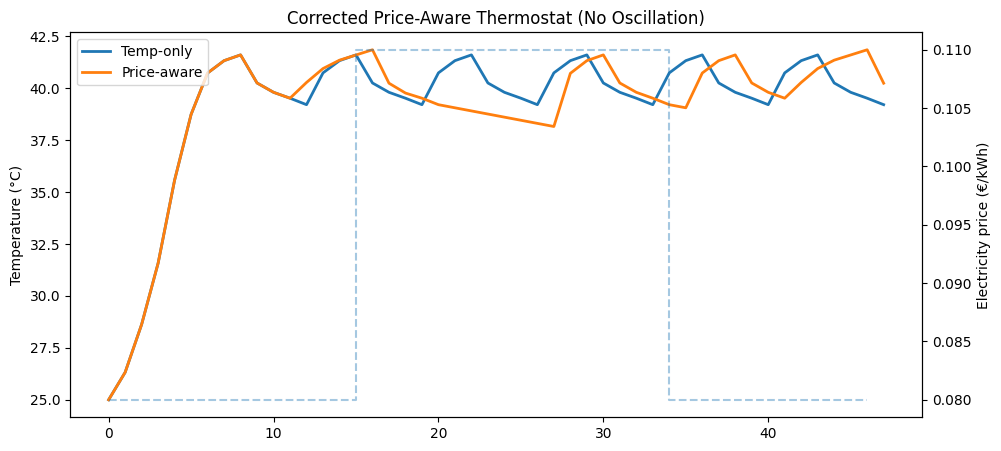

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# ============================================================
# 1) RAW DATA
# ============================================================

raw_data = """TEMP:25.00,CURR:0.000
TEMP:24.98,CURR:0.000
TEMP:25.04,CURR:1.716
TEMP:25.33,CURR:9.713
TEMP:26.52,CURR:17.154
TEMP:29.56,CURR:17.962
TEMP:33.19,CURR:17.441
TEMP:36.50,CURR:16.820
TEMP:39.15,CURR:16.427
TEMP:41.16,CURR:16.293
TEMP:40.60,CURR:3.710
TEMP:39.60,CURR:3.498
TEMP:39.76,CURR:15.875
TEMP:40.50,CURR:15.873
TEMP:41.28,CURR:15.882
TEMP:41.66,CURR:15.109
TEMP:40.67,CURR:0.741
TEMP:40.67,CURR:0.741
TEMP:39.89,CURR:15.870
TEMP:40.45,CURR:15.872
TEMP:41.41,CURR:15.888
TEMP:41.54,CURR:15.306
TEMP:40.64,CURR:0.712
TEMP:40.12,CURR:0.654
TEMP:39.71,CURR:0.652
TEMP:39.51,CURR:0.652
TEMP:39.22,CURR:0.612
TEMP:39.91,CURR:16.127
TEMP:40.33,CURR:16.214
TEMP:40.98,CURR:16.312
TEMP:41.46,CURR:15.905
TEMP:41.62,CURR:15.401
TEMP:40.88,CURR:3.982
TEMP:40.21,CURR:3.654
TEMP:39.78,CURR:3.201
TEMP:39.49,CURR:0.644
TEMP:39.12,CURR:0.601
TEMP:39.84,CURR:16.008
TEMP:40.27,CURR:16.118
TEMP:40.91,CURR:16.245
TEMP:41.39,CURR:15.873
TEMP:41.55,CURR:15.227
TEMP:40.72,CURR:2.214
TEMP:40.10,CURR:1.843
TEMP:39.66,CURR:1.115
TEMP:39.44,CURR:0.632
TEMP:39.18,CURR:0.604
TEMP:39.87,CURR:16.092"""

temps, heater = [], []

for line in raw_data.strip().splitlines():
    T = float(line.split(",")[0].split(":")[1])
    C = float(line.split(",")[1].split(":")[1])
    temps.append(T)
    heater.append(1 if C > 5 else 0)

temps = np.array(temps)
heater = np.array(heater)

# ============================================================
# 2) ML DATASET
# ============================================================

X, y = [], []
for i in range(len(temps) - 1):
    X.append([temps[i], heater[i]])
    y.append(temps[i + 1])

X, y = np.array(X), np.array(y)

# ============================================================
# 3) ML MODEL
# ============================================================

model = RandomForestRegressor(n_estimators=300, random_state=1)
model.fit(X, y)

def predict_next_temp(T, h):
    base = model.predict([[T, h]])[0]

    if h == 1:
        base = max(base, T + 0.25)   # force heating effect
    else:
        base = min(base, T - 0.15)   # force cooling effect

    return base

# ============================================================
# 4) ELECTRICITY PRICE
# ============================================================

def get_price(step, total):
    return "HIGH" if total * 0.35 < step < total * 0.75 else "LOW"

price_cost = {"LOW": 0.08, "HIGH": 0.11}

# ============================================================
# 5) HEATER MODEL
# ============================================================

HEATER_POWER_KW = 3.0
STEP_H = 5 / 60
ENERGY_PER_STEP = HEATER_POWER_KW * STEP_H

# ============================================================
# 6) THERMOSTATS
# ============================================================

def thermostat_temp_only(T, prev):
    if prev and T >= 41.5:
        return 0
    if not prev and T <= 39.5:
        return 1
    return prev


# 🔥 Price-aware thermostat with heater lock
def thermostat_price_aware(T, prev, price, lock):
    if price == "LOW":
        lower, upper = 39.8, 41.6
    else:
        lower, upper = 38.2, 41.2

    # if heater ON, keep it ON for remaining lock duration
    if prev == 1 and lock > 0:
        return 1, lock - 1

    # normal hysteresis behavior
    if prev == 1 and T >= upper:
        return 0, 0
    if prev == 0 and T <= lower:
        return 1, 2  # keep heater ON for at least 2 steps

    return prev, 0


# ============================================================
# 7) SIMULATION
# ============================================================

def simulate(mode):
    T = temps[0]
    h = heater[0]
    lock = 0

    T_hist = [T]
    price_hist = []
    energy = 0.0
    cost = 0.0

    for step in range(1, len(temps)):
        price_label = get_price(step, len(temps))
        price = price_cost[price_label]
        price_hist.append(price)

        if mode == "TEMP_ONLY":
            h = thermostat_temp_only(T, h)
        else:
            h, lock = thermostat_price_aware(T, h, price_label, lock)

        T = predict_next_temp(T, h)
        T_hist.append(T)

        e = h * ENERGY_PER_STEP
        energy += e
        cost += e * price

    return np.array(T_hist), np.array(price_hist), energy, cost


# ============================================================
# 8) RUN
# ============================================================

T_base, P_base, E_base, C_base = simulate("TEMP_ONLY")
T_price, P_price, E_price, C_price = simulate("PRICE_AWARE")

print("TEMP-ONLY cost:", round(C_base, 2))
print("PRICE-AWARE cost:", round(C_price, 2))
print("Savings:", round(C_base - C_price, 2))


# ============================================================
# 9) PLOT
# ============================================================

fig, ax1 = plt.subplots(figsize=(11, 5))

ax1.plot(T_base, label="Temp-only", linewidth=2)
ax1.plot(T_price, label="Price-aware", linewidth=2)
ax1.set_ylabel("Temperature (°C)")
ax1.legend(loc="upper left")

ax2 = ax1.twinx()
ax2.step(range(len(P_price)), P_price, linestyle="--", alpha=0.4)
ax2.set_ylabel("Electricity price (€/kWh)")

plt.title("Corrected Price-Aware Ther")
plt.show()



In [106]:
T_base

array([25.        , 26.32043333, 28.6265    , 31.5751    , 35.57386667,
       38.73616667, 40.7289    , 41.32343333, 41.60143333, 40.24938   ,
       39.80046667, 39.51656667, 39.20473333, 40.73566667, 41.32343333,
       41.60143333, 40.24938   , 39.80046667, 39.51656667, 39.20473333,
       40.73566667, 41.32343333, 41.60143333, 40.24938   , 39.80046667,
       39.51656667, 39.20473333, 40.73566667, 41.32343333, 41.60143333,
       40.24938   , 39.80046667, 39.51656667, 39.20473333, 40.73566667,
       41.32343333, 41.60143333, 40.24938   , 39.80046667, 39.51656667,
       39.20473333, 40.73566667, 41.32343333, 41.60143333, 40.24938   ,
       39.80046667, 39.51656667, 39.20473333])